In [86]:
import torch 
import pickle 
import numpy as np 
import pandas as pd
from torch.nn.functional import cosine_similarity
import tqdm 

log10_df = pickle.load(open('log_10_v2.pkl', "rb"))
REDRESS_data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/datasets/small_100_10/train_val4.pkl'
small_d = pickle.load(open(REDRESS_data_path, 'rb'))['df_track']

small_d = small_d[~small_d.track_name.str.contains('_CF')]

sanity = pickle.load(open('/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/final_pieces/old/sanity_track_check3.pkl', "rb"))
small_sanity = pd.merge(small_d, sanity, on='track_uri')

In [5]:
# log10_df

In [87]:
def get_counts_individual(x):
    return small_sanity[small_sanity.artist_name == x].appear_raw.sum()

def get_counts_all(x): 
    artist_list = [a for a in x]
    return artist_counts[artist_counts.artist_name.isin(artist_list)].log10_bin.astype(float).mean() 
    
artist_counts = pd.DataFrame({'artist_name': log10_df.artist_name.unique(), 
                             'raw_pop': log10_df['artist_name'].apply(lambda x: get_counts_individual(x))
                             }) 
artist_counts['log10_bin'] = pd.cut(np.log10(artist_counts.raw_pop), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True)

In [91]:
log10_df_v2 = log10_df[['artist_name', 'ps_artist', 'redress_artist', 'raw_artist', 'sr_artist', 'macr_artist', 'b_artist']].copy()
log10_df_v2['ps_avg_bins'] = log10_df_v2['ps_artist'].apply(lambda x: get_counts_all(x))
log10_df_v2['redress_avg_bins'] = log10_df_v2['redress_artist'].apply(lambda x: get_counts_all(x))
log10_df_v2['raw_avg_bins'] = log10_df_v2['raw_artist'].apply(lambda x: get_counts_all(x))
log10_df_v2['macr_avg_bins'] = log10_df_v2['macr_artist'].apply(lambda x: get_counts_all(x))
log10_df_v2['sr_avg_bins'] = log10_df_v2['sr_artist'].apply(lambda x: get_counts_all(x))
log10_df_v2['b_avg_bins'] = log10_df_v2['b_artist'].apply(lambda x: get_counts_all(x))


In [92]:
log10_v2_with_bins = pd.merge(artist_counts, log10_df_v2, on='artist_name')

In [95]:
def avg_bin_at_grp(df, emb, grp, name): 
    val = df[df.log10_bin == grp][emb].mean()
#     print(f'{grp} : {name} : {val:.3f}')
    return np.round(val,3)
    
ps, r, sr, macr, raw,b = [] , [] , [] , [] , [] , []
for group in range(10): 
    ps.append(avg_bin_at_grp(log10_v2_with_bins, 'ps_avg_bins', group, 'ps'))
    r.append(avg_bin_at_grp(log10_v2_with_bins, 'redress_avg_bins', group, 'redress'))
    sr.append(avg_bin_at_grp(log10_v2_with_bins, 'sr_avg_bins', group, 'sr')) 
    macr.append(avg_bin_at_grp(log10_v2_with_bins, 'macr_avg_bins', group, 'macr'))
    raw.append(avg_bin_at_grp(log10_v2_with_bins, 'raw_avg_bins', group, 'raw'))
    b.append(avg_bin_at_grp(log10_v2_with_bins, 'b_avg_bins', group, 'b'))
#     print("***********")
    



    
grp_9 = dict(zip( ['ps', 'redress', 'sr', 'macr', 'raw', 'boost'], [ps[-1], r[-1], sr[-1], macr[-1], raw[-1], b[-1]]))
grp_9
{k: v for k, v in sorted(grp_9.items(), key=lambda item: item[1])}    



{'redress': 1.091,
 'boost': 1.091,
 'macr': 1.172,
 'ps': 1.192,
 'sr': 1.192,
 'raw': 3.737}

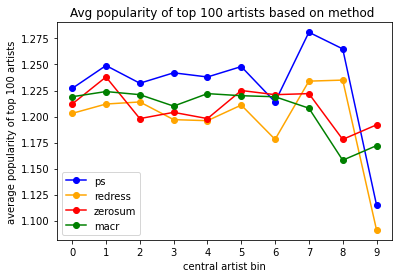

In [74]:
import matplotlib.pyplot as plt 
plt.plot(range(len(ps)), ps, c='blue', label='ps', marker = 'o')
plt.plot(range(len(r)), r, c='orange', label='redress', marker = 'o')
plt.plot(range(len(sr)), sr, c='red', label = 'zerosum', marker = 'o')
plt.plot(range(len(macr)), macr, c='green', label='macr', marker = 'o')
# plt.plot(range(len(raw)), raw, c='violet', label='raw', marker = 'o')
plt.xlabel('central artist bin')
plt.ylabel('average popularity of top 100 artists')
plt.title('Avg popularity of top 100 artists based on method ')
plt.xticks(range(len(sr)))
plt.legend()
plt.show()




In [36]:
# def get_counts(x): 
#     artist_list = [a for a in x]
#     return small_sanity[small_sanity.artist_name.isin(artist_list)].appear_raw.sum()
    
# def get_counts2(x):
# #     artist = x
#     return small_sanity[small_sanity.artist_name == x].appear_raw.sum()




# artist_counts = pd.DataFrame({'artist_name': log10_df.artist_name.unique(), 
#                              'raw_pop': log10_df['ps_artist'].apply(lambda x: get_counts(x)), 
#                              'redress_raw_count': log10_df['redress_artist'].apply(lambda x: get_counts(x)), 
#                              'mus_raw_count': log10_df['raw_artist'].apply(lambda x: get_counts(x)), 
#                              'sr_raw_count': log10_df['sr_artist'].apply(lambda x: get_counts(x)), 
#                              'macr_raw_count': log10_df['macr_artist'].apply(lambda x: get_counts(x))})    




def get_counts2(x):
    return small_sanity[small_sanity.artist_name == x].appear_raw.sum()

def get_bins(x): 
    artist_list = [a for a in x]
    return small_sanity[small_sanity.artist_name.isin(artist_list)].appear_raw.sum()


artist_counts = pd.DataFrame({'artist_name': log10_df.artist_name.unique(), 
                             'raw_pop': log10_df['artist_name'].apply(lambda x: get_counts2(x)),
                              'ps_raw_count': log10_df['ps_artist'].apply(lambda x: get_counts(x)), 
                            'redress_raw_count': log10_df['redress_artist'].apply(lambda x: get_counts(x)), 
                             'mus_raw_count': log10_df['raw_artist'].apply(lambda x: get_counts(x)), 
                             'sr_raw_count': log10_df['sr_artist'].apply(lambda x: get_counts(x)), 
                             'macr_raw_count': log10_df['macr_artist'].apply(lambda x: get_counts(x))
                             })    


In [38]:
artist_counts['bin'] = pd.cut(np.log10(artist_counts.raw_pop), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True)
artist_counts['ps_bin'] = pd.cut(np.log10(artist_counts.ps_raw_count), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
artist_counts['r_bin'] = pd.cut(np.log10(artist_counts.redress_raw_count), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
artist_counts['raw_bin'] = pd.cut(np.log10(artist_counts.mus_raw_count), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
artist_counts['sr_bin'] = pd.cut(np.log10(artist_counts.sr_raw_count), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
artist_counts['macr_bin'] = pd.cut(np.log10(artist_counts.macr_raw_count), 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 




In [39]:
artist_counts

,artist_name,raw_pop,ps_raw_count,redress_raw_count,mus_raw_count,sr_raw_count,macr_raw_count,bin,ps_bin,r_bin,raw_bin,sr_bin,macr_bin
0,$uicideBoy$,1,443,313,492,400,391,0,7,3,4,5,5
1,'Til Tuesday,1,385,371,583,281,386,0,6,5,5,2,5
2,*NSYNC,11,421,380,902,646,424,4,6,5,7,9,6
3,101 Strings Orchestra,2,397,359,480,309,418,1,6,4,4,3,6
4,2 Chainz,13,388,382,1744,488,292,5,6,5,9,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,will.i.am,4,356,337,676,395,406,2,5,4,5,5,6
3244,xxyyxx,14,399,470,308,408,477,5,6,7,2,6,7
3245,¡MAYDAY!,1,463,302,618,291,407,0,7,3,5,3,6
3246,Ásgeir,1,312,433,295,385,396,0,4,6,2,5,6


In [137]:
def LT_artists(df, emb): 
    return len(df[df[emb] == 0])

def LT_artist_cvg(df, emb): 
    artists = set([a for vec in df[emb].tolist() for a in vec])
    
    return covered

def average_pop(df, emb): 
    return df[emb].mean() 

def average_pop_lt(df, emb): 
    return df[df.artist_bin == 9][emb].mean()

def artist_lookup(df, emb): 
    artists = set([a for vec in df[emb].tolist() for a in vec])
    pop = artist_counts[artist_counts.artist_name.isin(artists)].bin.astype(float).mean()
    return pop

print("PS:{}, R:{}, RAW:{}, MACR:{}, SR:{}".format(
    LT_artists(artist_counts, 'ps_bin'), LT_artists(artist_counts, 'r_bin'),
    LT_artists(artist_counts, 'raw_bin'),  
      LT_artists(artist_counts, 'macr_bin'), LT_artists(artist_counts, 'sr_bin')) )

print("PS:{}, R:{}, RAW:{}, MACR:{}, SR:{}".format(
    artist_lookup(log10_df, 'ps_artist'), artist_lookup(log10_df, 'redress_artist'),
    artist_lookup(log10_df, 'raw_artist'),  
      artist_lookup(log10_df, 'macr_artist'), artist_lookup(log10_df, 'sr_artist')) )


def artist_lookup2(x): 
    artists = set([a for a in x])
    pop = artist_counts[artist_counts.artist_name.isin(artists)].bin.astype(float).mean()
    return pop


print(aver)

ps_pop2 = log10_df['ps_artist'].apply(lambda x:artist_lookup2(x)).mean()
r_pop2 = log10_df['redress_artist'].apply(lambda x:artist_lookup2(x)).mean()
mus_pop2 = log10_df['raw_artist'].apply(lambda x:artist_lookup2(x)).mean()
sr_pop2 = log10_df['sr_artist'].apply(lambda x:artist_lookup2(x)).mean()
macr_pop2 = log10_df['macr_artist'].apply(lambda x:artist_lookup2(x)).mean()
# b_pop2 = log10_df['b_artist'].apply(lambda x:artist_lookup2(x)).mean()

print(f"PS:{ps_pop2:.2f}, REDRESS:{r_pop2:.2f}, RAW:{mus_pop2:.2f}, SR:{sr_pop2:.2f}, MACR:{macr_pop2:.2f}")




PS:1, R:6, RAW:50, MACR:11, SR:16
PS:1.1967364532019704, R:1.1967364532019704, RAW:1.1967364532019704, MACR:1.1967970434246997, SR:1.1967364532019704
PS:1.23, REDRESS:1.20, RAW:1.85, SR:1.21, MACR:1.22


In [124]:
log10_df['ps_artist']

0       [Britney Spears, Beyoncé, Justin Timberlake, B...
1       [Britney Spears, Boys Like Girls, Electric Lig...
2       [Britney Spears, Beyoncé, Justin Timberlake, C...
3       [Britney Spears, Justin Timberlake, Avril Lavi...
4       [Britney Spears, Beyoncé, Justin Timberlake, B...
                              ...                        
3243    [Bobby Shmurda, Meghan Trainor, Lauv, Liam Pay...
3244    [Cassie, Cage The Elephant, Big Sean, Kid Cudi...
3245    [Cascada, Jason Derulo, Kesha, The Smashing Pu...
3246    [Justin Timberlake, Avril Lavigne, Nicki Minaj...
3247    [Britney Spears, Beyoncé, Justin Timberlake, B...
Name: ps_artist, Length: 3248, dtype: object

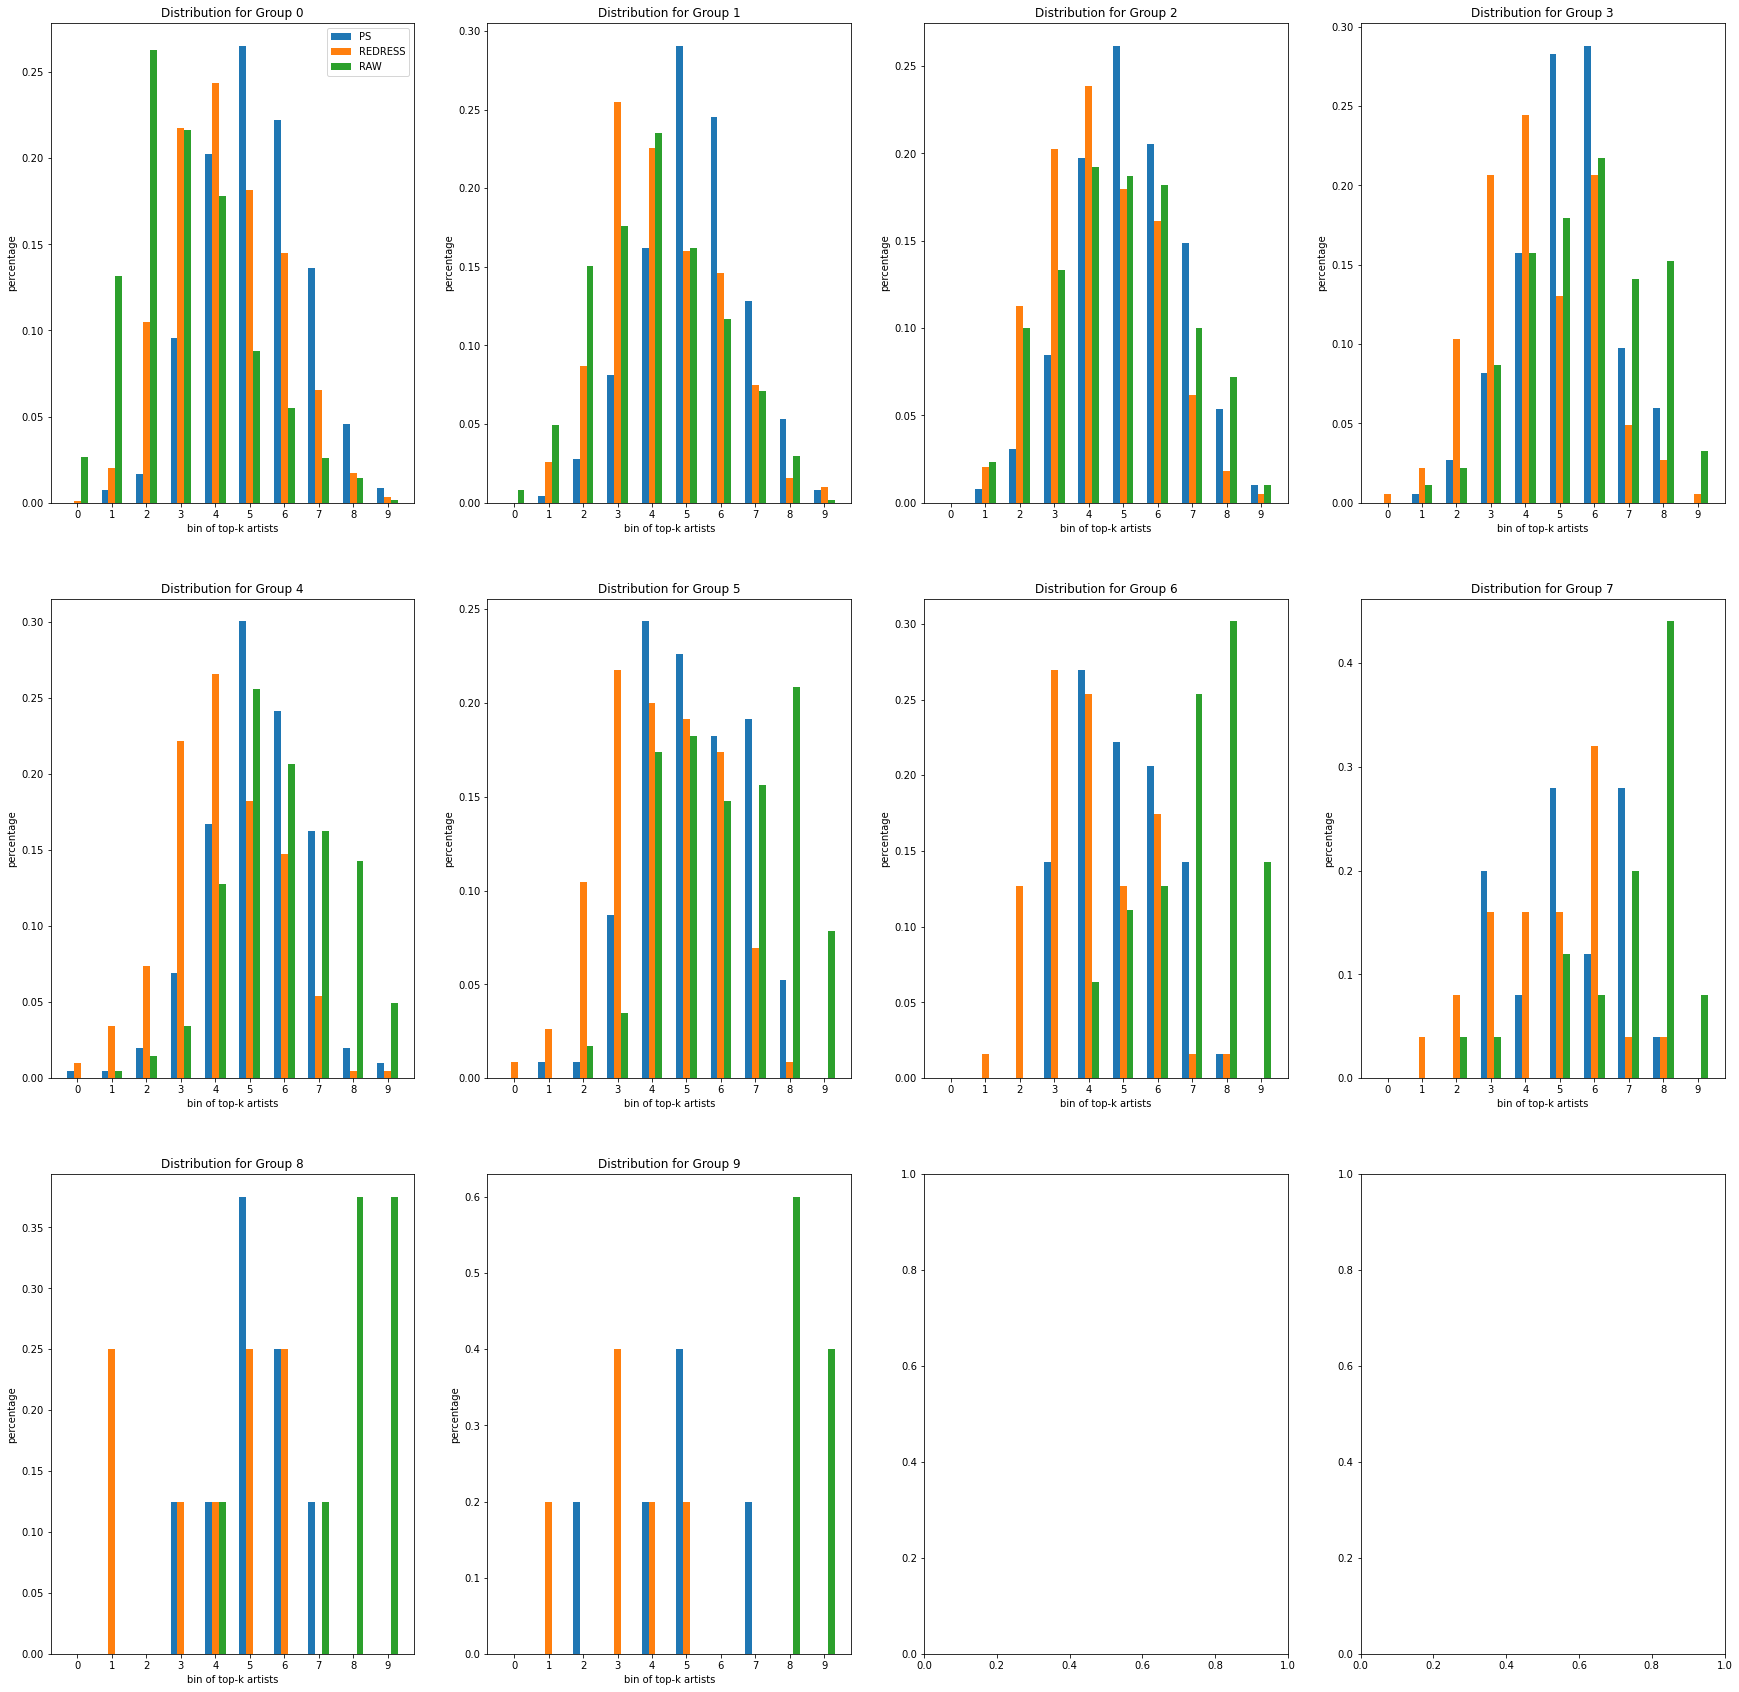

In [50]:
import matplotlib.pyplot as plt 
def plots(): 
    for grp in ps_groups.artist_bin.unique(): 
        x = np.arange(10)
        plt.bar(x-0.2, ps_groups[ps_groups.artist_bin == grp].num_in_bin.values, width=0.2, label='PS')
        plt.bar(x, r_groups[r_groups.artist_bin == grp].num_in_bin.values, width=0.2, label='REDRESS')
        plt.bar(x+0.2, raw_groups[raw_groups.artist_bin == grp].num_in_bin.values, width=0.2, label='RAW')
        plt.xlabel('bin')
        plt.xticks(x)
        plt.title(f'Distribution for Group {grp}')
        plt.legend()
        plt.show()
        
# def plots2(df, artist_bin):
#     fig, axes = plt.subplots(3, 4, figsize=(30, 30))

#     for grp, idx in pos:
#         row, col = idx[0], idx[1]
        
#         x = np.arange(10)
#         ps_means = pd.get_dummies(df[df[artist_bin] == grp][['ps_bin']], 
#                columns=['ps_bin']).mean()
#         r_means = pd.get_dummies(df[df[artist_bin] == grp][['r_bin']], 
#                columns=['r_bin']).mean()
#         raw_means = pd.get_dummies(df[df[artist_bin] == grp][['raw_bin']], 
#                columns=['raw_bin']).mean()
        
        
#         axes[row,col].bar(x-0.2, ps_means.values, width=0.2, label='PS')
#         axes[row,col].bar(x, r_means.values, width=0.2, label='REDRESS')
#         axes[row,col].bar(x+0.2, raw_means.values, width=0.2, label='RAW')
#         axes[row,col].set_xlabel('bin of top-k artists')
#         axes[row,col].set_ylabel('percentage')
#         axes[row,col].set_xticks(x)
        
        
        
#         axes[row,col].set_title(f'Distribution for Group {grp}')
#         if row == 0 and col == 0:  
#             axes[row,col].legend()
def plots2(df, artist_bin):
    fig, axes = plt.subplots(3, 4, figsize=(30, 30))

    for grp, idx in pos:
        row, col = idx[0], idx[1]
        
        x = np.arange(10)
        ps_means = pd.get_dummies(df[df[artist_bin] == grp][['bin']], 
               columns=['ps_bin']).mean()
        r_means = pd.get_dummies(df[df[artist_bin] == grp][['bin']], 
               columns=['r_bin']).mean()
        raw_means = pd.get_dummies(df[df[artist_bin] == grp][['raw_bin']], 
               columns=['raw_bin']).mean()
        
        
        axes[row,col].bar(x-0.2, ps_means.values, width=0.2, label='PS')
        axes[row,col].bar(x, r_means.values, width=0.2, label='REDRESS')
        axes[row,col].bar(x+0.2, raw_means.values, width=0.2, label='RAW')
        axes[row,col].set_xlabel('bin of top-k artists')
        axes[row,col].set_ylabel('percentage')
        axes[row,col].set_xticks(x)
        
        
        
        axes[row,col].set_title(f'Distribution for Group {grp}')
        if row == 0 and col == 0:  
            axes[row,col].legend()

pos = list(zip(sorted(artist_counts.bin.unique()), [[i,j] for i in range(3) for j in range(4)]))
     
        
plots2(artist_counts, 'bin')



In [75]:
import torch 
import pickle 
import numpy as np 
import pandas as pd
from torch.nn.functional import cosine_similarity

def load_all(data, u_emb, flag=False ):
    data = pickle.load(open(data, "rb"))
    if flag: 
        data = data['df_track']
        emb = pickle.load(open(u_emb, "rb"))
    else: 
        emb = pickle.load(open(u_emb, "rb")).detach().numpy()
    
    return data, emb 

# REDRESS_data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/datasets/small_100_10/train_val4.pkl'
# scratch = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/OLD/ablations_small_100_10/fairness_hp/cf/_G_1.0_A_0.01_B_0.0_Batch_1000/'
# REDRESS_utility_path = scratch + 'u_track_emb/embeddings_as_array_fullg.pkl'
# REDRESS_fair_path = scratch + 'u+f_track_emb/embeddings_as_array_fullg.pkl'


NGCF_data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/datasets/small_100_10/train_val4.pkl'
NGCF_emb_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/OLD/benchmarks/NGCF/small_cf_track_emb.pkl'


REDRESS_data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/datasets/small_100_10/train_val4.pkl'
REDRESS_fair_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/TINY_CF/G_1.0_A_0.01/redress/u_track_emb.pkl'

BOOST_utility_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/TINY_CF/G_1.0_A_0.01/utility/u_track_emb.pkl'
BOOST_data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/datasets/small_100_10/train_val4.pkl'
BOOST_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/TINY_CF/G_1.0_A_0.01/redress/u_track_emb.pkl'

MACR_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/TINY_CF/MACR/item_emb.pkl'

small_d = pickle.load(open(REDRESS_data_path, 'rb'))['df_track']


r_data, r_emb = load_all(REDRESS_data_path , REDRESS_fair_path, flag=True)
small_d['r_emb'] = [r for r in r_emb]
ps_data, ps_emb = load_all(REDRESS_data_path , BOOST_utility_path, flag=True)
small_d['ps_emb'] = [r for r in ps_emb]

macr_data, macr_emb = load_all(REDRESS_data_path , MACR_path, flag=True)
macr_emb = macr_emb.detach().numpy()
small_d['macr_emb'] = [r for r in macr_emb]

sr_data, sr_emb = load_all(NGCF_data_path , NGCF_emb_path, flag=True)
sr_emb = sr_emb.detach().numpy()
small_d['sr_emb'] = [r for r in sr_emb]


b_data, b_emb = load_all(BOOST_data_path , BOOST_path, flag=True)
# b_emb = b_emb.detach().numpy()
small_d['b_emb'] = [r for r in b_emb]


small_d = small_d[~small_d.track_name.str.contains('_CF')]

sanity = pickle.load(open('/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data/final_pieces/old/sanity_track_check3.pkl', "rb"))
small_sanity = pd.merge(small_d, sanity, on='track_uri')

mus_feat = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']


In [76]:
only_mus = small_sanity[['arid', 'artist_name', 'r_emb', 'ps_emb', 'macr_emb', 'sr_emb', 'b_emb', 
                         'appear_raw', 'log10_popcat'] + mus_feat]
only_mus['emb'] = only_mus[mus_feat].apply(lambda x: x[mus_feat].values.astype(float), axis=1)
artist_emb =only_mus.groupby('artist_name')['emb'].apply(lambda x: np.mean(x, axis=0).astype(float)).reset_index(name='emb') 
artist_pop = only_mus.groupby('artist_name')['log10_popcat'].apply(lambda x: np.max(list(x))).reset_index(name='log10_popcat')

artist_emb = pd.merge(artist_emb, artist_pop)                                                                                   
emb_list = [] 
for arid in only_mus.artist_name.unique(): 
    embs = only_mus[only_mus.artist_name == arid].r_emb
    val = np.mean(embs, axis=0).astype(float)
    emb_list.append(val)
artist_emb['r_emb'] = emb_list

emb_list = [] 
for arid in only_mus.artist_name.unique(): 
    embs = only_mus[only_mus.artist_name == arid].ps_emb
    val = np.mean(embs, axis=0).astype(float)
    emb_list.append(val)
artist_emb['ps_emb'] = emb_list

emb_list = [] 
for arid in only_mus.artist_name.unique(): 
    embs = only_mus[only_mus.artist_name == arid].macr_emb
    val = np.mean(embs, axis=0).astype(float)
    emb_list.append(val)
artist_emb['macr_emb'] = emb_list


emb_list = [] 
for arid in only_mus.artist_name.unique(): 
    embs = only_mus[only_mus.artist_name == arid].sr_emb
    val = np.mean(embs, axis=0).astype(float)
    emb_list.append(val)
artist_emb['sr_emb'] = emb_list

emb_list = [] 
for arid in only_mus.artist_name.unique(): 
    embs = only_mus[only_mus.artist_name == arid].b_emb
    val = np.mean(embs, axis=0).astype(float)
    emb_list.append(val)
artist_emb['b_emb'] = emb_list


arid_map = dict(zip(only_mus.artist_name.unique(), only_mus.arid.unique()))
artist_emb['arid'] = artist_emb['artist_name'].apply(lambda x: arid_map[x])
# pop_map = dict(zip(only_mus.arid.unique().tolist(), only_mus.appear_raw.tolist())) 
# artist_emb['appear_raw'] = artist_emb['arid'].apply(lambda x: pop_map[x])
# pop_map2 = dict(zip(only_mus.arid.unique().tolist(), only_mus.log10_popcat.tolist())) 
# artist_emb['log10_popcat'] = artist_emb['arid'].apply(lambda x: pop_map2[x])



/tmp/ipykernel_14306/1575800391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_mus['emb'] = only_mus[mus_feat].apply(lambda x: x[mus_feat].values.astype(float), axis=1)


In [109]:
artist_emb

,artist_name,emb,log10_popcat,r_emb,ps_emb,macr_emb,sr_emb,b_emb,arid
0,$uicideBoy$,"[3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0]",0,"[-0.008163155987858772, 0.01289308536797762, 0...","[-0.0036148973740637302, 0.011386440135538578,...","[0.4489714503288269, 0.4312158524990082, 0.496...","[0.11534173786640167, -0.0526668019592762, 0.0...","[-0.008163155987858772, 0.01289308536797762, 0...",7105
1,'Til Tuesday,"[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0]",0,"[-0.0026397446636110544, 0.004451988264918327,...","[-0.023039020597934723, 0.005205131601542234, ...","[0.5393379926681519, 0.4896794259548187, 0.506...","[-0.018483811989426613, -0.09264373779296875, ...","[-0.0026397446636110544, 0.004451988264918327,...",1831
2,*NSYNC,"[2.7, 3.0, 2.9, 2.5, 1.0, 1.6, 1.9, 3.0, 1.9]",3,"[-0.003258914453908801, 0.003930950537323952, ...","[-0.0021704719401896, 0.03631772845983505, -0....","[0.5012250542640686, 0.4629495143890381, 0.495...","[0.10734856128692627, -0.08208628743886948, 0....","[-0.003258914453908801, 0.003930950537323952, ...",1107
3,101 Strings Orchestra,"[1.0, 1.0, 1.5, 1.0, 3.0, 3.0, 1.0, 2.0, 1.0]",0,"[-0.0008386087720282376, -0.004044872708618641...","[0.016607167199254036, -0.0007738851709291339,...","[0.5733718276023865, 0.5056247711181641, 0.486...","[-0.009530201554298401, -0.10256015509366989, ...","[-0.0008386087720282376, -0.004044872708618641...",7620
4,2 Chainz,"[2.6666666666666665, 2.2222222222222223, 2.666...",3,"[0.0041604069992899895, -0.0003236648626625538...","[-0.003451300784945488, 0.037717439234256744, ...","[0.5344099402427673, 0.45595407485961914, 0.53...","[0.14237861335277557, -0.023681234568357468, -...","[0.0041604069992899895, -0.0003236648626625538...",1038
...,...,...,...,...,...,...,...,...,...
3243,will.i.am,"[3.0, 2.0, 2.3333333333333335, 2.3333333333333...",3,"[0.017184030264616013, 0.009553030133247375, 0...","[0.07152476906776428, 0.08942147344350815, -0....","[0.3822019100189209, 0.37831544876098633, 0.38...","[0.21971507370471954, -0.06587761640548706, -0...","[0.017184030264616013, 0.009553030133247375, 0...",1035
3244,xxyyxx,"[2.4285714285714284, 1.2857142857142858, 1.142...",0,"[-0.00777435814961791, 0.02548462152481079, 0....","[0.019631534814834595, -0.014814477413892746, ...","[0.49615243077278137, 0.4960208237171173, 0.49...","[0.1523718386888504, 0.0691690519452095, 0.090...","[-0.00777435814961791, 0.02548462152481079, 0....",3630
3245,¡MAYDAY!,"[3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 2.0, 2.0]",0,"[0.006292289588600397, 0.010085104033350945, -...","[-0.04515724629163742, -0.014838052913546562, ...","[0.5347824692726135, 0.5379717350006104, 0.539...","[0.15027280151844025, 0.010179281234741211, 0....","[0.006292289588600397, 0.010085104033350945, -...",13284
3246,Ásgeir,"[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0]",0,"[0.009959823451936245, 0.011155867017805576, 0...","[-0.011245853267610073, 0.03255223482847214, -...","[0.47144821286201477, 0.46906131505966187, 0.4...","[0.2349691540002823, -0.03359421715140343, 0.0...","[0.009959823451936245, 0.011155867017805576, 0...",9060


In [54]:
# beatles = torch.tensor(artist_emb[artist_emb.artist_name == 'The Beatles']['emb'].values[0])
# all_arid = torch.tensor(artist_emb['emb'])
# scores = torch.Tensor(cosine_similarity(beatles, all_arid))
# vals, idx = torch.topk(scores, 10)
# top_arid = artist_emb.loc[idx.tolist()]
# # small_sanity[small_sanity.artist_name.isin(top_arid.artist_name.unique())].artist_name.unique()
# raw_artists = small_sanity[small_sanity.artist_name.isin(top_arid.artist_name.unique())].artist_name.unique()
# raw_artists, vals
# print(small_sanity[small_sanity.artist_name.isin(raw_artists[1:])].appear_raw.astype(float).mean(), 
#      small_sanity[small_sanity.artist_name.isin(raw_artists[1:])].log10_popcat.astype(float).mean(), 
#      artist_emb[artist_emb.artist_name.isin(raw_artists[1:])].log10_popcat.astype(float).mean())


In [78]:
def find_top_artists(df, arid, emb_type, k, mode): 
    central_artist = torch.tensor(df[df.artist_name == arid][emb_type].values[0])
    all_artists = torch.tensor(df[emb_type])
    scores = torch.Tensor(cosine_similarity(central_artist, all_artists))
    vals, idx = torch.topk(scores, k)
    top_arid = df.loc[idx[1:].tolist()]
    if mode == 1: 
        return small_sanity[small_sanity.artist_name.isin(top_arid.artist_name.unique())]
    if mode == 0: 
        return df[df.artist_name.isin(top_arid.artist_name.unique())]


ps_arid = find_top_artists(artist_emb, 'The Beatles', 'ps_emb', 100, mode=1)
ps_pop = ps_arid.log10_popcat.astype(float).mean()
r_arid = find_top_artists(artist_emb, 'The Beatles', 'r_emb', 100, mode=1)
r_pop = r_arid.log10_popcat.astype(float).mean() 
mus_arid = find_top_artists(artist_emb, 'The Beatles', 'emb', 100, mode=1)
mus_pop = mus_arid.log10_popcat.astype(float).mean() 
sr_arid = find_top_artists(artist_emb, 'The Beatles', 'sr_emb', 100, mode=1)
sr_pop = sr_arid.log10_popcat.astype(float).mean() 
macr_arid = find_top_artists(artist_emb, 'The Beatles', 'macr_emb', 100, mode=1)
macr_pop = macr_arid.log10_popcat.astype(float).mean() 

b_arid = find_top_artists(artist_emb, 'The Beatles', 'b_emb', 100, mode=1)
b_pop = b_arid.log10_popcat.astype(float).mean() 

print(f"PS:{ps_pop:.2f}, REDRESS:{r_pop:.2f}, RAW:{mus_pop:.2f}, SR:{sr_pop:.2f}, MACR:{macr_pop:.2f},BOOST:{b_pop:.2f}, ")
      
    



/tmp/ipykernel_14306/1874196489.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1673797350542/work/torch/csrc/utils/tensor_new.cpp:230.)
  all_artists = torch.tensor(df[emb_type])


PS:0.63, REDRESS:0.45, RAW:0.37, SR:0.79, MACR:0.43,BOOST:0.45, 


In [111]:
def PCA_on_emb(emb): 
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    u_pca = pca.fit_transform(emb) 

    u_df = pd.DataFrame()
    u_df['x'] = u_pca[:, 0]
    u_df['y'] = u_pca[:, 1]

    return u_pca, u_df

mus_emb_data = torch.tensor(artist_emb['emb'])
r_emb_data = torch.tensor(artist_emb['r_emb'])
ps_emb_data = torch.tensor(artist_emb['ps_emb'])
sr_emb_data = torch.tensor(artist_emb['sr_emb'])
macr_emb_data = torch.tensor(artist_emb['macr_emb'])
boost_emb_data = torch.tensor(artist_emb['b_emb'])


mus_pca, _ = PCA_on_emb(mus_emb_data)
r_pca, _ = PCA_on_emb(r_emb_data)
ps_pca, _ = PCA_on_emb(ps_emb_data)
macr_pca, _ = PCA_on_emb(macr_emb_data)
sr_pca, _ = PCA_on_emb(sr_emb_data)
b_pca, _ = PCA_on_emb(boost_emb_data)


m_df = artist_emb[artist_emb.artist_name.isin(mus_arid.artist_name.unique()[1:])][['artist_name']]
r_df = artist_emb[artist_emb.artist_name.isin(r_arid.artist_name.unique()[1:])][['artist_name']]
ps_df = artist_emb[artist_emb.artist_name.isin(ps_arid.artist_name.unique()[1:])][['artist_name']]
sr_df = artist_emb[artist_emb.artist_name.isin(sr_arid.artist_name.unique()[1:])][['artist_name']]
macr_df = artist_emb[artist_emb.artist_name.isin(macr_arid.artist_name.unique()[1:])][['artist_name']]
b_df = artist_emb[artist_emb.artist_name.isin(b_arid.artist_name.unique()[1:])][['artist_name']]

In [113]:
def plot_artist_embs(mus_embs, beatles, df_dict, idx_dict, marker_dict, color_dict, avg_dict, lines = True, annotate=False, **kwargs): 
    
    fig, axes = plt.subplots(2, 3, figsize=(30, 10), )
    
    for method in df_dict.keys(): 
        row, col = idx_dict[method][0], idx_dict[method][1]
        marker = marker_dict[method]
        df = df_dict[method]
        color = color_dict[method]
    
        X = mus_embs[df.index, 0]
        Y = mus_embs[df.index, 1]
        axes[row,col].scatter(X, Y, alpha=0.4, c=color, marker = marker, label=method, s=100)
        axes[row,col].scatter(mus_embs[beatles, 0], mus_embs[beatles, 1], alpha=1.0, color='black', s=300)
        axes[row,col].annotate('The Beatles', (mus_embs[beatles, 0]-0.5, mus_embs[beatles, 1] - 0.7), fontsize=20, weight='bold')
     
        if lines: 
            for i in range(len(X)):
                x = [X[i], mus_embs[beatles, 0]]
                y = [Y[i], mus_embs[beatles, 1]]
                axes[row,col].plot(x, y, c='black', alpha=.2, )
            
        axes[row,col].set_title(f"{method}: Average Pop:{avg_dict[method]:.2f} ", fontsize=25)
#     fig.delaxes(axes[1,2])
    return axes

array([[<AxesSubplot:title={'center':'Raw Music Features: Average Pop:0.37 '}>,
        <AxesSubplot:title={'center':'MACR: Average Pop:0.43 '}>,
        <AxesSubplot:title={'center':'REDRESS: Average Pop:0.45 '}>],
       [<AxesSubplot:title={'center':'BOOST: Average Pop:0.45 '}>,
        <AxesSubplot:title={'center':'PinSage: Average Pop:0.63 '}>,
        <AxesSubplot:title={'center':'ZeroSum: Average Pop:0.79 '}>]],
      dtype=object)

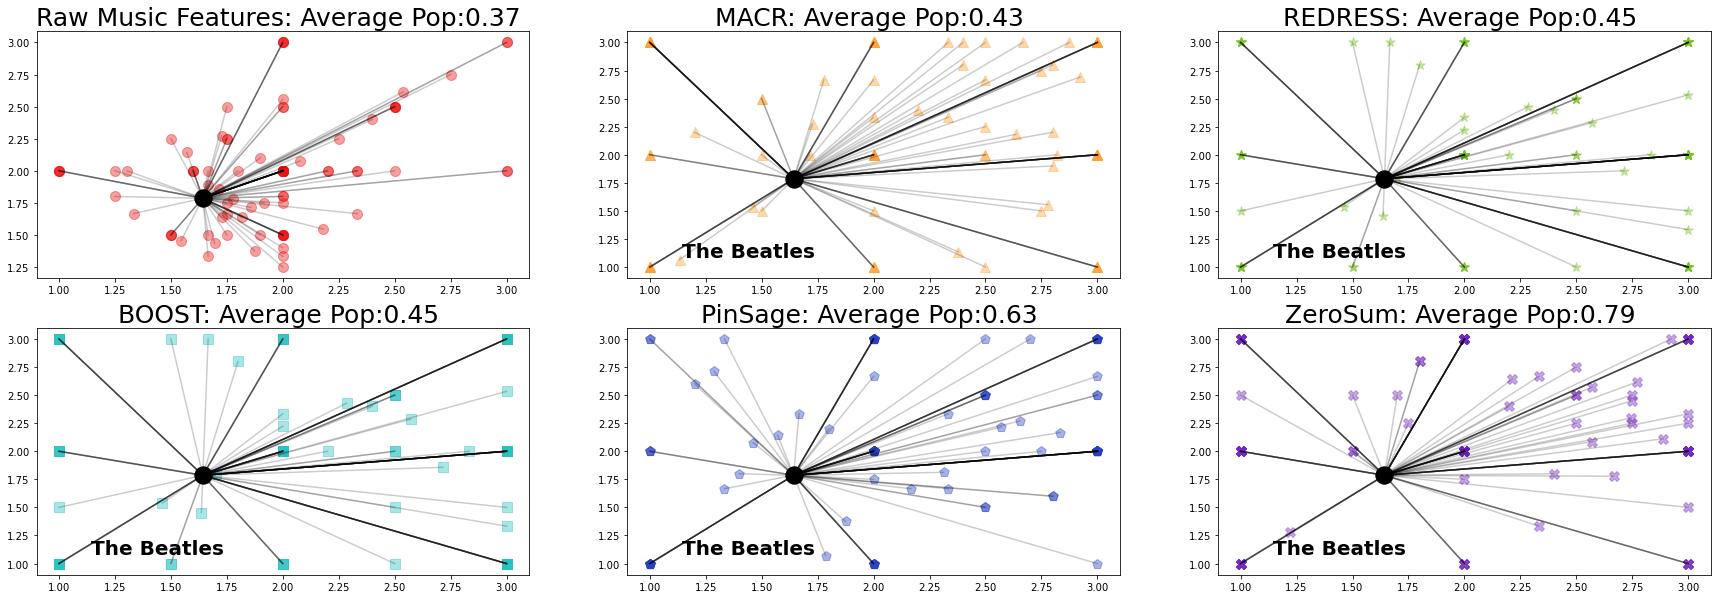

In [115]:
beatle_idx = artist_emb[artist_emb.artist_name == 'The Beatles'].index
df_dict = {
    'Raw Music Features': m_df,
    'MACR': macr_df, 
    'REDRESS': r_df, 
    'BOOST': b_df,
    'PinSage': ps_df, 
    'ZeroSum': sr_df,    
}
avg_dict = {'PinSage': ps_pop, 
    'Raw Music Features': mus_pop, 
    'REDRESS': r_pop, 
    'ZeroSum': sr_pop, 
    'MACR': macr_pop, 
    'BOOST': b_pop}
color = ['#ed1111', '#FFA233', '#79C226', '#26C2C2', '#2640C2', '#7226C2', '#D829A0']
color_dict = dict(zip(df_dict.keys(), color))
marker_dict = dict(zip(df_dict.keys(), ['o', "^", "*", 's', 'p', 'X']))

idx_dict = dict(zip(df_dict.keys(), [[i,j] for i in range(2) for j in range(3)]))
     
plot_artist_embs(mus_emb_data, beatle_idx, df_dict, idx_dict, marker_dict, color_dict, avg_dict)

# print(f"PS:{ps_pop:.2f}, REDRESS:{r_pop:.2f}, RAW:{mus_pop:.2f}, SR:{sr_pop:.2f}, MACR:{macr_pop:.2f}")
    
# plot_artist_embs3(mus_emb_data, beatle_idx, ps_df, r_df, m_df, sr_df, macr_df, '') 

In [260]:
small_sanity[small_sanity.artist_name == 'The Beatles'].log10_popcat.astype(float).mean()

1.3571428571428572

In [79]:
row_log10 = []
for arid in tqdm.tqdm(artist_emb.artist_name.unique()):
    our_artist_popcat = small_sanity[small_sanity.artist_name == arid].log10_popcat.astype(float).mean()
    ps = find_top_artists(artist_emb, arid, 'ps_emb', 100, mode =1)
    redress = find_top_artists(artist_emb, arid, 'r_emb', 100, mode =1)
    raw = find_top_artists(artist_emb, arid, 'emb', 100, mode=1)
    macr = find_top_artists(artist_emb, arid, 'macr_emb', 100, mode=1)
    sr = find_top_artists(artist_emb, arid, 'sr_emb', 100, mode=1)
    b = find_top_artists(artist_emb, arid, 'b_emb', 100, mode=1)
    
    ps_artist = ps.artist_name.unique()
    ps_avg_popcat = ps.log10_popcat.astype(float).mean()
    ps_avg_appear = ps.appear_raw.astype(float).mean()
    
    redress_artist = redress.artist_name.unique()
    redress_avg_popcat = redress.log10_popcat.astype(float).mean()
    redress_avg_appear = redress.appear_raw.astype(float).mean()
    
    
    raw_artist = raw.artist_name.unique()
    raw_avg_popcat = raw.log10_popcat.astype(float).mean()
    raw_avg_appear = raw.appear_raw.astype(float).mean()
    
    macr_artist = macr.artist_name.unique()
    macr_avg_popcat = macr.log10_popcat.astype(float).mean()
    macr_avg_appear = macr.appear_raw.astype(float).mean()
    
    sr_artist = sr.artist_name.unique()
    sr_avg_popcat = sr.log10_popcat.astype(float).mean()
    sr_avg_appear = sr.appear_raw.astype(float).mean()
    
    b_artist = b.artist_name.unique()
    b_avg_popcat = b.log10_popcat.astype(float).mean()
    b_avg_appear = b.appear_raw.astype(float).mean()
    

    
    row_log10.append([arid, our_artist_popcat, 
                      ps_artist, redress_artist, raw_artist, sr_artist, macr_artist, b_artist,  
                      ps_avg_popcat, redress_avg_popcat, raw_avg_popcat, sr_avg_popcat, macr_avg_popcat, b_avg_popcat
                     ])
    
    
log10_df = pd.DataFrame(row_log10, columns = ['artist_name', 'artist_pop', 
                                              'ps_artist', 'redress_artist', "raw_artist", "sr_artist", 
                                              "macr_artist", "b_artist",  
                                              'ps_avg_popcat', 'redress_avg_popcat', 
                                              'raw_avg_popcat', 'sr_avg_popcat', 'macr_avg_popcat', 
                                              'b_avg_popcat'])

ps_artist, redress_artist, raw_artist, sr_artist, macr_artist, b_artist,  


pickle.dump(log10_df, open('log_10_v2.pkl', "wb"))

100%|█████████████████████████████████████████████████████████████████████████████████████████| 3248/3248 [1:25:35<00:00,  1.58s/it]


ValueError: 13 columns passed, passed data had 14 columns

In [85]:
log10_df = pd.DataFrame(row_log10, columns = ['artist_name', 'artist_pop', 
                                              'ps_artist', 'redress_artist', "raw_artist", "sr_artist", 
                                              "macr_artist", "b_artist",  
                                              'ps_avg_popcat', 'redress_avg_popcat', 
                                              'raw_avg_popcat', 'sr_avg_popcat', 'macr_avg_popcat', 
                                              'b_avg_popcat'])
pickle.dump(log10_df, open('log_10_v2.pkl', "wb"))

In [8]:
# log10_df
# row_log10, row_appear = [] , [] 
# for arid in tqdm.tqdm(artist_emb.artist_name.unique()):
#     ps = find_top_artists(artist_emb, arid, 'ps_emb', 10, mode =1).log10_popcat.astype(float).mean()
#     redress = find_top_artists(artist_emb, arid, 'r_emb', 10, mode =1).log10_popcat.astype(float).mean()
#     raw = find_top_artists(artist_emb, arid, 'emb', 10, mode=1).log10_popcat.astype(float).mean()
#     our_artist = small_sanity[small_sanity.artist_name == arid].log10_popcat.astype(float).mean()
#     row_log10.append([arid, our_artist, ps, redress, raw])
    
#     ps = find_top_artists(artist_emb, arid, 'ps_emb', 10, mode =1).appear_raw.astype(float).mean()
#     redress = find_top_artists(artist_emb, arid, 'r_emb', 10, mode =1).appear_raw.astype(float).mean()
#     raw = find_top_artists(artist_emb, arid, 'emb', 10, mode=1).appear_raw.astype(float).mean()
#     our_artist = small_sanity[small_sanity.artist_name == arid].appear_raw.astype(float).mean()
#     row_appear.append([arid, our_artist, ps, redress, raw])
    
    
# log10_df = pd.DataFrame(row_log10, columns = ['artist_name', 'artist_pop', 'ps_pop', 'redress_pop', 'raw_pop'])
# log10_df

# appear_df = pd.DataFrame(row_appear, columns = ['artist_name', 'artist_pop', 'ps_pop', 'redress_pop', 'raw_pop'])
# appear_df

    



In [208]:
# pickle.dump(log10_df, open('log_10.pkl', "wb"))

In [ ]:
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 3, figsize=(30, 10), )

# plt.scatter(scatter_df.artist_pop, scatter_df.ps_pop, alpha=0.5, color='red', label='PS')
# plt.scatter(scatter_df.artist_pop, scatter_df.redress_pop,alpha=0.5, color='green', label='REDRES')
# plt.scatter(scatter_df.artist_pop, scatter_df.raw_pop, alpha=0.5,color='blue', label='MUS')
# plt.legend()
# plt.xlabel('Central Artist Pop')
# plt.ylabel('Top 10 Artist Pop')
# plt.title('LOG10 based pop')

fig, axes = plt.subplots(1, 3, figsize=(30, 10), )

axes[0].hist(log10_df['ps_bin'], alpha=0.5)
axes[1].hist(log10_df['r_bin'], alpha=0.5)
axes[2].hist(log10_df['raw_bin'], alpha=0.5)


axes[0].set_xlabel('Central Artist Pop')
axes[1].set_xlabel('Central Artist Pop')
axes[2].set_xlabel('Central Artist Pop')
axes[0].set_ylabel('Top 10 Artist Pop')
axes[1].set_ylabel('Top 10 Artist Pop')
axes[2].set_ylabel('Top 10 Artist Pop')

axes[0].set_title('LOG10 based pop - PS')
axes[1].set_title('LOG10 based pop - REDRESS')
axes[2].set_title('LOG10 based pop - MUS')


In [211]:
ps_groups = log10_df.groupby('artist_bin')[['ps_bin']].value_counts().reset_index(name='num_in_bin')
r_groups = log10_df.groupby('artist_bin')[['r_bin']].value_counts().reset_index(name='num_in_bin')
raw_groups = log10_df.groupby('artist_bin')[['raw_bin']].value_counts().reset_index(name='num_in_bin')


In [25]:
def LT_artists(df, emb): 
    return len(df[df[emb] == 0])

def LT_artist_cvg(df, emb): 
    covered = len(set([a for vec in df[emb].tolist() for a in vec]))
    
    return covered

def average_pop(df, emb): 
    return df[emb].mean() 

def average_pop_lt(df, emb): 
    return df[df.artist_bin == 0][emb].mean()

log10_df['artist_bin'] = pd.cut(log10_df.artist_pop, 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
log10_df['ps_bin'] = pd.cut(log10_df.ps_avg_popcat, 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
log10_df['r_bin'] = pd.cut(log10_df.redress_avg_popcat, 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
log10_df['raw_bin'] = pd.cut(log10_df.raw_avg_popcat, 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
log10_df['sr_bin'] = pd.cut(log10_df.sr_avg_popcat, 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 
log10_df['macr_bin'] = pd.cut(log10_df.macr_avg_popcat, 10, labels=list(range(10)), retbins = False, precision=3, ordered=True) 

print("PS:{}, R:{}, RAW:{}, MACR:{}, SR:{}".format(
    LT_artists(log10_df, 'ps_bin'), LT_artists(log10_df, 'r_bin'),LT_artists(log10_df, 'raw_bin'),  
      LT_artists(log10_df, 'macr_bin'), LT_artists(log10_df, 'sr_bin')) )

print("PS:{}, R:{}, RAW:{}, MACR:{}, SR:{}".format(
    average_pop(log10_df, 'ps_avg_popcat'), average_pop(log10_df, 'redress_avg_popcat'),average_pop(log10_df, 'raw_avg_popcat'),  
    average_pop(log10_df, 'macr_avg_popcat'), average_pop(log10_df, 'sr_avg_popcat')) )

# print("PS:{}, R:{}, RAW:{}, MACR:{}, SR:{}".format(
#     LT_artist_cvg(log10_df, 'ps_artist'), 
#     LT_artist_cvg(log10_df, 'redress_artist'),
#     LT_artist_cvg(log10_df, 'raw_artist'),  
#     LT_artist_cvg(log10_df, 'macr_artist'), 
#     LT_artist_cvg(log10_df, 'sr_artist')) )


print("PS:{}, R:{}, RAW:{}, MACR:{}, SR:{}".format(
    average_pop_lt(log10_df, 'ps_avg_popcat'), 
    average_pop_lt(log10_df, 'redress_avg_popcat'),
    average_pop_lt(log10_df, 'raw_avg_popcat'),  
    average_pop_lt(log10_df, 'macr_avg_popcat'), 
    average_pop_lt(log10_df, 'sr_avg_popcat')) )





PS:34, R:15, RAW:59, MACR:55, SR:53
PS:0.6220218053285074, R:0.6383702159613915, RAW:0.6488509181259008, MACR:0.6240732228662993, SR:0.6196137955376864
PS:0.6229855613468579, R:0.6368137429527304, RAW:0.6118954861663394, MACR:0.6247199857275528, SR:0.6183626786141299


In [21]:
 

ss = log10_df[log10_df.artist_name == '$uicideBoy$']['ps_artist'].apply(lambda x: [a for a in x])
ss.to_list()[0]
small_sanity[small_sanity.artist_name.isin(ss.to_list()[0])]

,track_uri,track_name_x,arid,artist_uri,alid_x,album_uri_x,followers,popularity,danceability,energy,...,r_emb,ps_emb,macr_emb,sr_emb,tid_y,arid_x,alid_y,track_name_y,album_uri_y,artist_name
1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Toxic,1,spotify:artist:26dSoYclwsYLMAKD3tpOr4,1,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,9858081.0,83,3,3,...,"[0.008898021, 0.010026664, -0.0074469843, 0.02...","[0.0041646534, -0.038700316, -0.041957233, 0.0...","[0.49384266, 0.45562053, 0.46799403, 0.4515021...","[-0.10896419, -0.16449088, -0.046384238, -0.07...",1,1,1,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,Britney Spears
2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,2,spotify:album:25hVFAxTlDvXbx2X2QkUkE,29209077.0,86,3,3,...,"[0.016632292, 0.0095499875, 0.011228472, 0.007...","[-0.0020626225, 0.06508226, 0.018557034, -0.03...","[0.37041852, 0.45121303, 0.39337236, 0.3988378...","[-0.041802607, -0.21342367, 0.20095977, -0.332...",2,2,2,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,Beyoncé
3,spotify:track:1AWQoqb9bSvzTjaLralEkT,Rock Your Body,3,spotify:artist:31TPClRtHm23RisEBtV3X7,3,spotify:album:6QPkyl04rXwTGlGlcYaRoW,11305869.0,82,3,2,...,"[-0.014921107, -0.0075861844, 0.028410075, 0.0...","[0.015858011, -0.04369864, 0.014597226, 0.0523...","[0.52234316, 0.47293627, 0.513979, 0.5070465, ...","[-0.11829258, -0.14947383, -0.0878965, 0.49164...",3,3,3,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justin Timberlake
15,spotify:track:6d8A5sAx9TfdeseDvfWNHd,Check On It - feat. Bun B and Slim Thug,2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,18,spotify:album:3MJHoQUI828kmB6IpjejbW,29209077.0,86,3,3,...,"[-0.0012963735, 0.007802576, 0.00845601, 0.027...","[0.011686918, -0.030889757, -0.02792138, -0.01...","[0.5584608, 0.42681202, 0.50835264, 0.43816027...","[-0.059050534, -0.1807977, -0.042239156, 0.005...",18,2,18,Check On It - feat. Bun B and Slim Thug,spotify:album:3MJHoQUI828kmB6IpjejbW,Beyoncé
79,spotify:track:557un1HgwYMuqfWGSTmnxw,Single Ladies (Put a Ring on It),2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,281,spotify:album:3ROfBX6lJLnCmaw1NrP5K9,29209077.0,86,1,2,...,"[-0.0042560156, 0.002759495, -0.0026023758, 0....","[-0.047291078, 0.022004642, -0.025933588, -0.0...","[0.42375913, 0.5141915, 0.428429, 0.43506837, ...","[0.23429945, -0.12983565, 0.067798495, -0.0804...",336,2,281,Single Ladies (Put a Ring on It),spotify:album:3ROfBX6lJLnCmaw1NrP5K9,Beyoncé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9261,spotify:track:5bnYpia8buVRofu4Yi8eHI,All Night,13190,spotify:artist:3SFoCWkrLUgz3MGnkSa5ra,596170,spotify:album:5X8OmQeljGBKiVO507b5tg,1912.0,25,3,2,...,"[0.0059638727, 0.010917328, 0.028066544, 0.009...","[0.047108155, 0.08302914, -0.08163484, -0.0072...","[0.4905698, 0.49482873, 0.5085276, 0.5141023, ...","[-0.13111293, 0.08641651, 0.19741292, -0.08738...",1749722,13190,596170,All Night,spotify:album:5X8OmQeljGBKiVO507b5tg,Chase
9325,spotify:track:250jy0ZohWnyuhnilCnd9E,El Aguacate - En Vivo,4327,spotify:artist:7yCGrS6Xh3UngvY6Ad5sMJ,604996,spotify:album:406096R3Xt8wchvEmRF019,1053038.0,65,3,2,...,"[-0.007962842, 0.009354073, 0.018268237, 0.006...","[0.058312528, 0.07094145, -0.07419807, 0.04689...","[0.5014215, 0.5007669, 0.49965203, 0.50024384,...","[0.19752587, -0.059644926, 0.044562463, -0.232...",1997104,4327,604996,El Aguacate - En Vivo,spotify:album:406096R3Xt8wchvEmRF019,LEGADO 7
9326,spotify:track:43Kz1yB1pcMjSrbVKsjszW,Verde Verde - En Vivo,4327,spotify:artist:7yCGrS6Xh3UngvY6Ad5sMJ,604996,spotify:album:406096R3Xt8wchvEmRF019,1053038.0,65,3,2,...,"[-0.0015793543, 0.0049718013, 0.019680608, 0.0...","[0.08987605, 0.025394635, -0.09628905, 0.03897...","[0.5002666, 0.4999258, 0.50073475, 0.4989057, ...","[0.12637307, 0.0081105875, -0.02741991, -0.166...",1997105,4327,604996,Verde Verde - En Vivo,spotify:album:406096R3Xt8wchvEmRF019,LEGADO 7
9327,spotify:track:6f90uHFzdh7WPVRzmKj9ih,El H9 - En Vivo,4327,spotify:artist:7yCGrS6Xh3UngvY6Ad5sMJ,604996,

Text(0.5, 1.0, 'appear based pop')

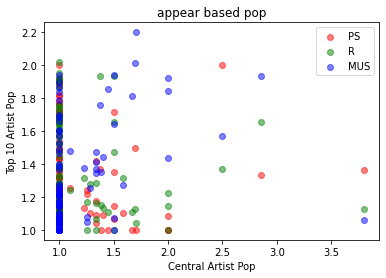

In [43]:
plt.scatter(appear_df.artist_pop, appear_df.ps_pop, alpha=0.5, color='red', label='PS')
plt.scatter(appear_df.artist_pop, appear_df.redress_pop,alpha=0.5, color='green', label='R')
plt.scatter(appear_df.artist_pop, appear_df.raw_pop, alpha=0.5,color='blue', label='MUS')
plt.legend()
plt.xlabel('Central Artist Pop')
plt.ylabel('Top 10 Artist Pop')
plt.title('appear based pop')


In [82]:
log10_df.corr()

,artist_pop,ps_pop,redress_pop,raw_pop
artist_pop,1.000000,-0.082041,-0.134882,0.356812
ps_pop,-0.082041,1.000000,-0.082348,-0.200847
redress_pop,-0.134882,-0.082348,1.000000,-0.037265
raw_pop,0.356812,-0.200847,-0.037265,1.000000


Text(0.5, 1.0, 'LOG10 based pop - MUS')

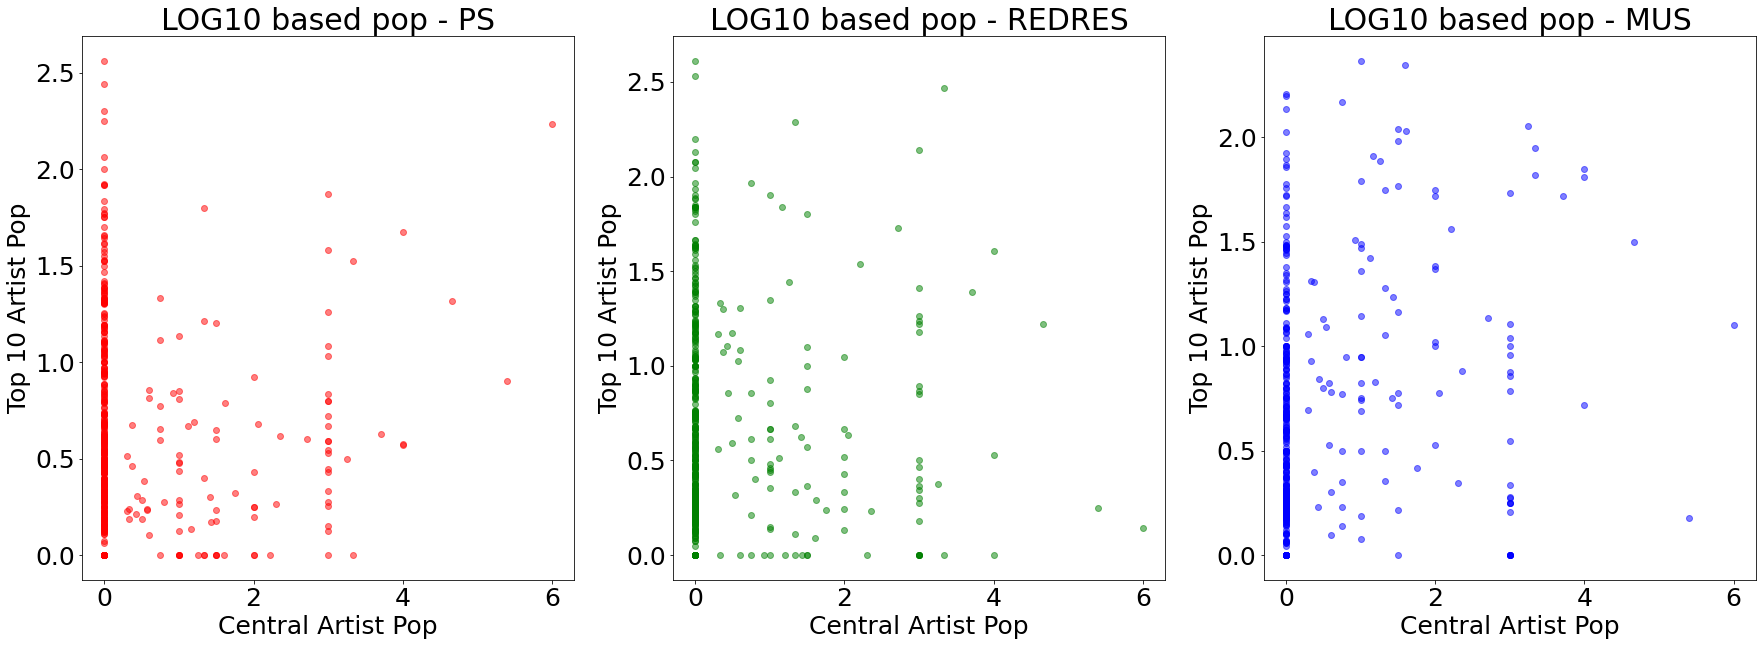

In [72]:
import matplotlib as mpl 
mpl.rcParams['font.size'] = 25
fig, axes = plt.subplots(1, 3, figsize=(30, 10), )

axes[0].scatter(scatter_df.artist_pop, scatter_df.ps_pop, alpha=0.5, color='red', label='PS')
axes[1].scatter(scatter_df.artist_pop, scatter_df.redress_pop,alpha=0.5, color='green', label='REDRES')
axes[2].scatter(scatter_df.artist_pop, scatter_df.raw_pop, alpha=0.5,color='blue', label='MUS')

axes[0].set_xlabel('Central Artist Pop')
axes[1].set_xlabel('Central Artist Pop')
axes[2].set_xlabel('Central Artist Pop')
axes[0].set_ylabel('Top 10 Artist Pop')
axes[1].set_ylabel('Top 10 Artist Pop')
axes[2].set_ylabel('Top 10 Artist Pop')

axes[0].set_title('LOG10 based pop - PS')
axes[1].set_title('LOG10 based pop - REDRES')
axes[2].set_title('LOG10 based pop - MUS')
